In [67]:
%load_ext jupyter_ai_magics

In [2]:
from datascience import *
import numpy as np

## Visualization

We learned about some basic building blocks in Python, tables, how to read and manipulate data in them, etc. Now, the data we worked with consisted of barely few rows. In the real-world, you are going to work with large datasets. Look at the example below! 

How do you look at such data? We talked about the `show` method that helps you look at just a snapshot of your data. But what are some other ways of organizing and visualizing data? Enter Visualizations! 

In [3]:
salaries = Table.read_table("data/Latest_Data_Science_Salaries.csv")
salaries.show(5)

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


### Cleaning your data

Spoiler alert! Real-world datasets are not always clean! You might have to process your data, convert it into a desired format as well as clean it. It is important to pay attention to this as it can lead to erroneous calculations and slow you down in your analysis.

Check for null values (remove them or impute them to mean values), duplicate entries (remove them)

In [4]:
salaries_unclean = Table.read_table("data/salaries_modified.csv")

In [5]:
# check if you have null entires (nan stands for not a number) - typically, you want to remove such entries or impute them with mean values (depending on the use case)
np.count_nonzero(np.isnan(salaries_unclean.column('Salary in USD'))) 

4

In [30]:
# check if you have missing Salary values as well (maybe you can use Salary and currency to get Salary in USD?)
np.count_nonzero(np.isnan(salaries_unclean.column('Salary'))) 

4

In [42]:
# let's remove rows with nan values
# The ~ operator inside the where method is used as a logical NOT operator. It reverses the boolean values in the nan_mask array, where True becomes False and False becomes True
# filtered_salaries = salaries_unclean.where(~np.isnan(salaries_unclean.column('Salary in USD')))
# Here, where selects rows where the logical operator is true
filtered_salaries = salaries_unclean.where(np.logical_not(np.isnan(salaries_unclean.column('Salary in USD')))) # inverts boolean values in an array
filtered_salaries

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


In [43]:
np.count_nonzero(np.isnan(filtered_salaries.column('Salary in USD'))) 

0

In [80]:
# Convert the table to a numpy array
# https://www.data8.org/datascience/_autosummary/datascience.tables.Table.rows.html#datascience.tables.Table.rows
# type(salaries_unclean.rows)
data = np.array(filtered_salaries.rows) 

# finds unique elements of an array and also returns the number of times each unique item appears
# axis to operate on, here axis=0 is important if we want to find unique rows (axis=1 would give us unique columns - doesn't make sense in this case)
unique_rows, counts = np.unique(data, axis=0, return_counts=True) # gives us two arrays

print("output of np.unique - ")
print(unique_rows, counts)

duplicate_rows = unique_rows[counts > 1]

print("duplicate rows - ")
duplicate_rows

output of np.unique - 
[['AI Architect' 'Full-Time' 'Executive' ..., 'Belgium' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Medium' '2023']
 ..., 
 ['Staff Data Scientist' 'Contract' 'Senior' ..., 'United States' 'Medium'
  '2021']
 ['Staff Data Scientist' 'Full-Time' 'Senior' ..., 'United States' 'Medium'
  '2020']
 ['Staff Machine Learning Engineer' 'Full-Time' 'Senior' ...,
  'United States' 'Medium' '2021']] [1 1 1 ..., 1 1 1]
duplicate rows - 


array([['Analytics Engineer', 'Full-Time', 'Senior', 'Expert', '208500.0',
        'United States Dollar', 'United States', '208500.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '75000.0',
        'British Pound Sterling', 'United Kingdom', '92280.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '85000.0',
        'British Pound Sterling', 'United Kingdom', '104584.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '165000.0',
        'United States Dollar', 'United States', '165000.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '210000.0',
        'United States Dollar', 'United States', '210000.0',
        'United States', 'Medium', '2023'],
       ['Data Scientist', 'Full-Time', 'Senior', 'Expert', '130000.0',
        'United States Dollar', 'Unite

In [82]:
filtered_salaries.labels # gives us column names

('Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year')

In [85]:
filtered_unique_salaries = Table(filtered_salaries.labels).with_rows(unique_rows) # let's create a table with unique rows
filtered_unique_salaries

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
AI Architect,Full-Time,Executive,Director,200000.0,Euro,United States,215936.0,Belgium,Large,2023
AI Architect,Full-Time,Senior,Expert,200000.0,United States Dollar,United States,200000.0,United States,Large,2023
AI Architect,Full-Time,Senior,Expert,204000.0,United States Dollar,United States,204000.0,United States,Medium,2023
AI Architect,Full-Time,Senior,Expert,330000.0,United States Dollar,United States,330000.0,United States,Medium,2023
AI Developer,Full-Time,Entry,Junior,120000.0,United States Dollar,Bosnia and Herzegovina,120000.0,Bosnia and Herzegovina,Small,2023
AI Developer,Full-Time,Entry,Junior,200000.0,Euro,Germany,215936.0,Germany,Large,2023
AI Developer,Full-Time,Entry,Junior,60000.0,Euro,Germany,64781.0,Germany,Medium,2023
AI Developer,Full-Time,Entry,Junior,80000.0,United States Dollar,Sweden,80000.0,Sweden,Medium,2023
AI Developer,Full-Time,Mid,Intermediate,100000.0,Singapore Dollar,Finland,74883.0,Finland,Medium,2023
AI Developer,Full-Time,Mid,Intermediate,200000.0,United States Dollar,United States,200000.0,United States,Medium,2023


In [86]:
# Now, you can see that there are no duplicates!
# Convert the table to a numpy array
# https://www.data8.org/datascience/_autosummary/datascience.tables.Table.rows.html#datascience.tables.Table.rows
# type(salaries_unclean.rows)
data = np.array(filtered_unique_salaries.rows) 

# finds unique elements of an array and also returns the number of times each unique item appears
# axis to operate on, here axis=0 is important if we want to find unique rows (axis=1 would give us unique columns - doesn't make sense in this case)
unique_rows, counts = np.unique(data, axis=0, return_counts=True) # gives us two arrays

print("output of np.unique - ")
print(unique_rows, counts)

duplicate_rows = unique_rows[counts > 1]

print("duplicate rows - ")
duplicate_rows

output of np.unique - 
[['AI Architect' 'Full-Time' 'Executive' ..., 'Belgium' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Medium' '2023']
 ..., 
 ['Staff Data Scientist' 'Contract' 'Senior' ..., 'United States' 'Medium'
  '2021']
 ['Staff Data Scientist' 'Full-Time' 'Senior' ..., 'United States' 'Medium'
  '2020']
 ['Staff Machine Learning Engineer' 'Full-Time' 'Senior' ...,
  'United States' 'Medium' '2021']] [1 1 1 ..., 1 1 1]
duplicate rows - 


array([], shape=(0, 11),
      dtype='<U40')

#### Some other checks we could perform
Verify consistency of values in a field - For example, check if numeric values are within a reasonable range (Salary in this case)

Use methods to convery certain categories/values to upper or lower case - For example, if the data had the "Expert" level with several cases such as "EXpert", "EXPERT", "expert". We might benefit from converting them all to lower of upper cased versions.

Hint: use where to check range, inconsistent values (for example, if you want to check for an unusual job title or if you expect values of job title to have certain values

In [50]:
# Convert the table to a numpy array
# https://www.data8.org/datascience/_autosummary/datascience.tables.Table.rows.html#datascience.tables.Table.rows
# type(salaries_unclean.rows)
data = np.array(salaries_unclean.rows) 

# Check for duplicate rows based on both columns of the data array
unique_rows, counts = np.unique(data, axis=0, return_counts=True)

duplicate_rows = unique_rows[counts > 1] # this is a way to check which rows have counts > 1

duplicate_rows
# Convert the duplicate rows array into a datascience table
#duplicate_table = Table().from_records(duplicate_rows)

array([['Analytics Engineer', 'Full-Time', 'Senior', 'Expert', '208500.0',
        'United States Dollar', 'United States', '208500.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '75000.0',
        'British Pound Sterling', 'United Kingdom', '92280.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '85000.0',
        'British Pound Sterling', 'United Kingdom', '104584.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '165000.0',
        'United States Dollar', 'United States', '165000.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '210000.0',
        'United States Dollar', 'United States', '210000.0',
        'United States', 'Medium', '2023'],
       ['Data Scientist', 'Full-Time', 'Senior', 'Expert', '130000.0',
        'United States Dollar', 'Unite

In [87]:
%%ai openai-chat:gpt-3.5-turbo
unique_rows[counts > 1]. What does this do?

The expression `unique_rows[counts > 1]` filters the `unique_rows` array to only include rows that have a count greater than 1. 

To provide more context, `np.unique` returns the unique rows of a given array along with their counts. The result is returned as two arrays: `unique_rows` contains the unique rows, and `counts` contains the corresponding counts for each unique row.

By using the boolean condition `counts > 1`, we create a boolean array where each element represents whether the count for the corresponding row is greater than 1. 

By applying this boolean array as an index to `unique_rows`, we only select the rows where the count is greater than 1, effectively filtering out the unique rows and keeping duplicate rows. 

Here is an example to demonstrate this:

```python
import numpy as np

# Create an array with duplicate rows
arr = np.array([[1, 2], [2, 3], [1, 2], [3, 4], [2, 3]])

# Get the unique rows and their counts
unique_rows, counts = np.unique(arr, axis=0, return_counts=True)

# Filter unique rows to only include rows with count > 1
filtered_rows = unique_rows[counts > 1]

# Display the filtered rows
print(filtered_rows)
```

Output:
```
[[1 2]
 [2 3]]
```

The resulting `filtered_rows` array contains the rows `[1, 2]` and `[2, 3]`, which are the duplicate rows in the original array.

#### Terminology
A `variable` is a formal name for a "feature" or "attribute", such as ‘Salary’. The term variable emphasizes the point that a feature can have different values for different individuals. For example, the salary varies across different employees.

Variables can have `numerical` values, i.e. they can be measured numerically, such as 'Salary in USD' or 'Salary'. These are called quantitative or numerical variables. Variables can also have `categorical` values such as 'Experience Level' or 'Expertise Level'. These are called categorical variables.

When we say `distributions`, we typically want to look at how many individuals (i.e., the frequency of individuals) that have a particular value for each different value of the variable.

#### Scatter Plots
A scatter plot displays the relation between two numerical variables. 

In [4]:
# needed for plotting with datascience module
%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')

from IPython.display import display, Image

In [5]:
movies = Table.read_table("data/movies_by_year_with_ticket_price.csv")
movies.show(5)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2019,9.16,11237.9,788,Avengers: Endgame
2018,9.11,11611.3,878,Black Panther
2017,8.97,11125.4,740,Star Wars: Episode VIII - The Last Jedi
2016,8.65,11373.7,737,Rogue One: A Star Wars Story
2015,8.43,11098.8,706,Star Wars: Episode VII - The Force Awakens


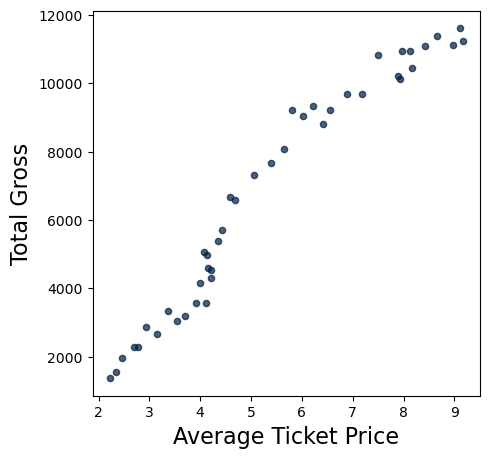

In [7]:
movies.scatter('Average Ticket Price', 'Total Gross')

Observe the plot above. It makes you wonder...Does a higher average ticket price have an effect on total gross amount? This question attempts to assign a cause to an effect. This brings us to the concepts of `causality` and `association`. Suggested Reading: https://inferentialthinking.com/chapters/02/causality-and-experiments.html

You can find answers to such questions after carefully observing the data such as by performing an _observational study_ (in which scientists make conclusions based on data observed). Many such studies involve observations on a group of individuals, a factor of interest called a `treatment`, and an `outcome` measured on each individual. So now the question is whether the treatment (here, average ticket price) has an effect on the outcome (here, total gross).

Any relation between the treatment and the outcome is called an `association`. If the treatment causes the outcome to occur, then the association is `causal`. 

Here, we can say that the average ticket price and the total gross are _positively associated_ as you can see that as the average ticket price tends to increase, so does the total gross value. But we cannot really say anything about causality simply from this plot. For example, the number of movies could have also affected the total gross value (such factors are called `confounding` factors as they 'confound' or mess you up when you try to make a conclusion).

For establishing causality, we would have to dig deeper. Typically, scientists divide the data into control and treatment (with the factor of interest) groups such that the two groups are comparable to each other, apart from the treatment.

Like we pointed out in the case above, we want to avoid confounding while doing so! This can be done by assigning individuals to the treatment and control groups at `random`, and then administering the treatment to those who were assigned to the treatment group. Randomization keeps the two groups similar apart from the treatment.

If you are able to randomize individuals into the treatment and control groups, you are running a randomized controlled experiment, also known as a randomized controlled trial (RCT). You might have heard of this term in news articles!

##### chatgpt time! 
Now let us understand these terms using chatgpt!

In [6]:
%%ai openai-chat:gpt-3.5-turbo --format code
Assume that I have a table loaded called movies (with columns Year, Average Ticket Price, Total Gross, Number of Movies, Number 1 Movie). I want to understand how Average Ticket Price and Total Gross are related through a visualization. Use the datascience module in Python and annotate the code as if you'd explain it to a child.

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


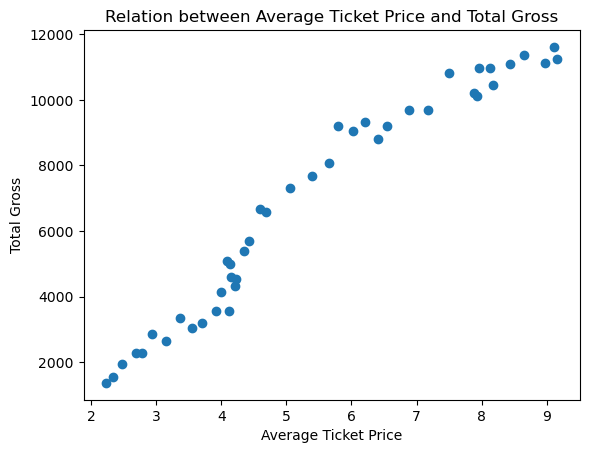

In [11]:
import datascience as ds
import matplotlib.pyplot as plt

# Create a scatter plot to show the relationship between Average Ticket Price and Total Gross
plt.scatter(movies.column('Average Ticket Price'), movies.column('Total Gross'))

# Set the x-axis label
plt.xlabel('Average Ticket Price')

# Set the y-axis label
plt.ylabel('Total Gross')

# Set the title of the plot
plt.title('Relation between Average Ticket Price and Total Gross')

# Display the plot
plt.show()

In [17]:
%%ai openai-chat:gpt-3.5-turbo
From the above plot, can you tell me if Average Ticket Price and Total Gross have an association? Do they have a causal relationship or just association? What would I need to do to prove causality?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


Based on the scatter plot, we can observe that there is a positive association between the Average Ticket Price and Total Gross. This means that as the Average Ticket Price increases, the Total Gross tends to increase as well.

However, it's important to note that association does not imply causation. While there is a relationship between the two variables, we cannot conclude that changing the Average Ticket Price directly causes changes in the Total Gross based solely on the scatter plot.

To establish a causal relationship between Average Ticket Price and Total Gross, we would need to conduct further research using methods such as controlled experiments or observational studies. By manipulating the Average Ticket Price and carefully controlling other factors, we can gather more evidence to support a causal relationship. Additionally, conducting statistical analyses and considering potential confounding variables can also help in determining causality.

#### Line plots
The Table method `plot` produces a line plot. Its two arguments are the same as those for scatter: first the column on the horizontal axis, then the column on the vertical. They are often used to see chronological trends/patterns.

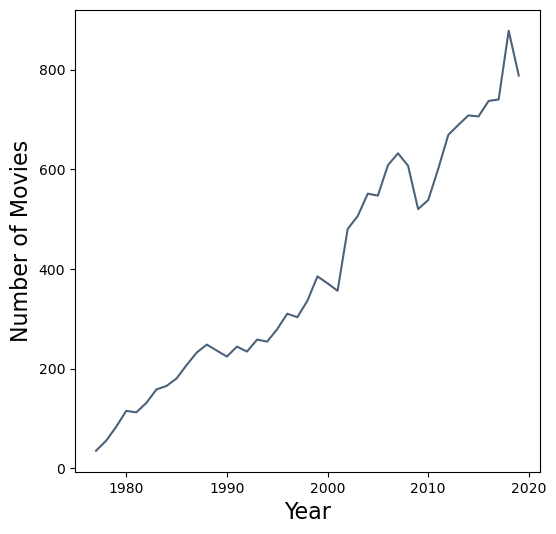

In [19]:
movies.plot('Year', 'Number of Movies')

### Visualizing Categorical Distributions (not numerical data)
Examples of categorical variables - Icecream flavors, Experience Level, Expertise Level, etc.
Suggested Reading: https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html

#### Bar chart
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

In [28]:
salaries_grouped = salaries.group('Expertise Level')
salaries_grouped

Expertise Level,count
Director,146
Expert,2065
Intermediate,797
Junior,292


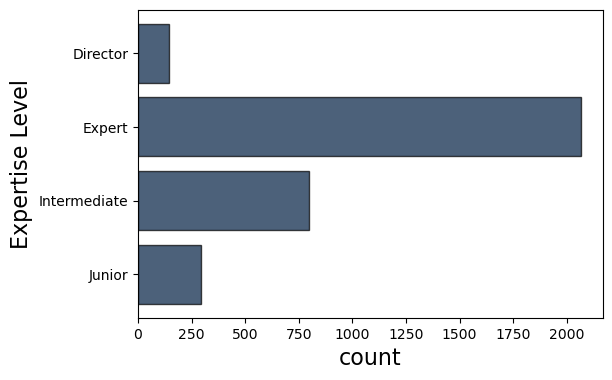

In [30]:
salaries_grouped.barh('Expertise Level', 'count') # or you can also just say salaries_grouped.barh('Expertise Level')

### Visualizing Numerical Distributions
A lot of variables you will come across are quantitative or numerical. Say we want to look at the salaries in the salaries table.

#### Histogram 
A histogram is a visualization of the distribution of a quantitative variable. It looks very much like a bar chart but its different.

First, let us make it easier for us to read the salary data. 

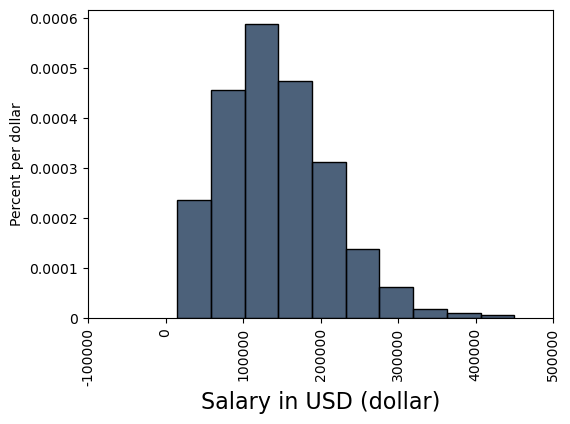

In [67]:
salaries.hist('Salary in USD', unit='dollar')

#### Bins
Now, it is even more interesting to group the values into intervals, known as `bins`, and see how many people are in each bin. This process is called `binning`.

In [61]:
usd_salaries = salaries.column('Salary in USD')
# print(usd_salaries)
min(usd_salaries), max(usd_salaries)

(15000, 450000)

In [66]:
# you can specify a number of bins and that'll lead to that many equally spaced bins
bins_10 = salaries.bin('Salary in USD', bins=10)
bins_10.show()

bin,Salary in USD count
15000,339
58500,655
102000,844
145500,682
189000,449
232500,196
276000,89
319500,25
363000,14
406500,7


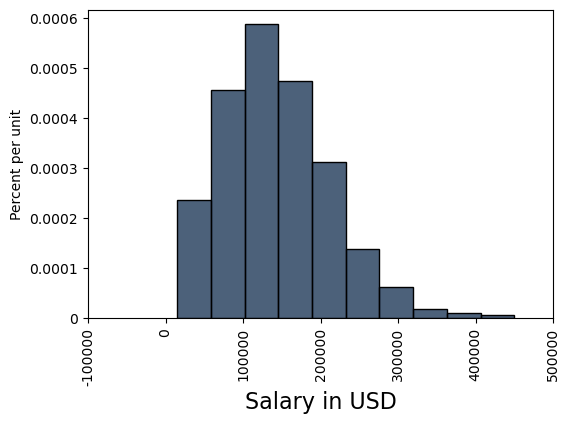

In [83]:
salaries.hist('Salary in USD', bins=10)

In [82]:
# but bin sizes dont have to be equal! 
bins_uneven = salaries.bin('Salary in USD', bins=[15000, 100000, 200000, 500000])
bins_uneven

bin,Salary in USD count
15000,929
100000,1719
200000,652
500000,0


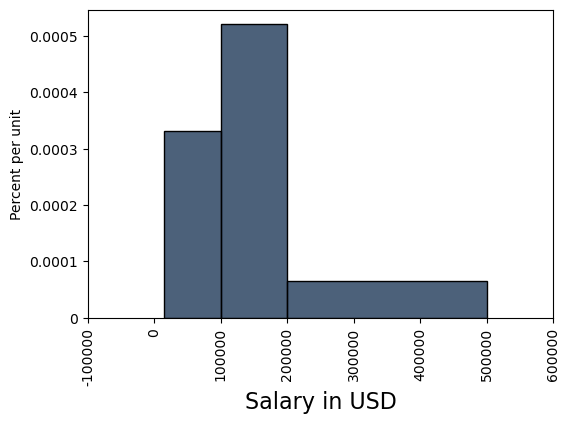

In [84]:
salaries.hist('Salary in USD', bins=[15000, 100000, 200000, 500000])

In [64]:
bin_counts = salaries.bin('Salary in USD', bins=np.arange(15000,475000,25000))
bin_counts.show()

bin,Salary in USD count
15000,138
40000,299
65000,360
90000,435
115000,474
140000,453
165000,371
190000,309
215000,166
240000,129


Look at the `bin` column. This column specifies the left end of each bin, except in the last row. Since the bins split the number line into intervals, they are contiguous. 
Each element in the `Salary in USD count` column counts all the Salary in USD values that are greater than or equal to the value in bin, but less than the next value in bin (look at the next row for this value). 

Note that we will use the notation [a, b) to refer to the bin that contains all the values that are greater than or equal to a and strictly less than b. Here, you can tell that there are 138 people in the bin [15000, 40000), i.e. with a Salary in USD value greater than or equal to 15000 but less than 40000!

For the last bin - Look at the bin value 465000 in the last row. That’s not the left endpoint of any bin. Instead, it’s the right endpoint of the last bin. This bin is different from all the others in that it has the form [a, b]. It includes the data at both endpoints. Here, we don't have any Salary in USD value that is 465000. 

Now let's plot again!

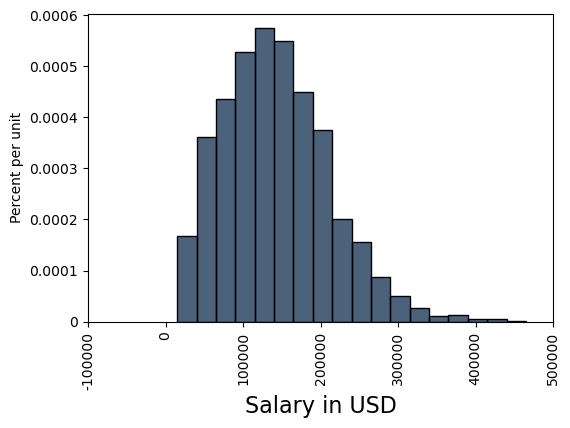

In [65]:
salaries.hist('Salary in USD', bins=np.arange(15000,475000,25000)) # notice that bins is an optional argument

You can see that a lot of people have salaries between 100000 and 200000 and a very small number of them have salaries above 300000. 

#### Area principle and density
The area of each bar of the histogram is proportional to the percent of individuals/entries in the corresponding bin. The total area of all the bars in the histogram is 100%. In terms of proportions, we can say that the areas of all the bars in a histogram “sum to 1”.

The height of the histogram is the area of the bar divided by the width of the bin (remember, bins don't have to be equally spaced!). So the height is called density or crowdedness. 

The reason we plot histograms on a density scale is because it allows us to compare histograms that are based on data sets of different sizes or have different choices of bins.

Let's look at this using our example! There are 138 people in the bin [15000, 40000) and the table salaries contains a total of 3300 people (hint: salaries.num_rows). 

In [85]:
# The first bin contains 4.18 % of all the employees (area is percent of entries in bin)
138/3300*100

4.181818181818182

In [75]:
# width of the bin is 25000
40000 - 15000

25000

In [80]:
# so the height of the bar is 4.18 % divided by 25000 dollars which is 0.0001672 % per dollar (you can see this is the case in the plot above)
4.18/25000

0.0001672

### How are bar charts and histograms different? Confused?

**Numerical vs Categorical**: Bar charts show a numerical quantity per category (=> used for distributions of _categorical_ variables). Histograms are used for the distributions of _numerical_ variables.

**Bar width**: All the bars in a bar chart have the same width and an equal amount of space between consecutive bars. The bars of a histogram are contiguous and the bins are drawn to scale on the number line. Bins can be unequal in a histogram.

**Counts vs Density**: The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the count in each category. The heights of bars in a histogram measure densities; the areas of bars in a histogram are proportional to the counts in the bins. bins

##### chatgpt time! 
We are going to slowly begin to understand how to use chatgpt to analyze our data!

In [16]:
%%ai openai-chat:gpt-3.5-turbo
What are histograms? I have a loaded a table called salaries. It has a column called 'Salary in USD' that goes from 15000 to 450000. I want to plot a histogram using hist method with reasonable bins. Please explain it like you would to a 5 year old. 

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


Histograms are like bar charts, but instead of showing different categories, they help us understand how data is distributed. Imagine you have a bunch of numbers (salaries in this case), ranging from $15,000 to $450,000. A histogram will show how many salaries fall into different ranges, or what we call "bins".

To plot a histogram using the `hist` method in Python, based on the "Salary in USD" column, we can use the following code:

```python
import datascience as ds
import matplotlib.pyplot as plt

# Read the table called "salaries"
salaries = ds.Table.read_table("salaries.csv")

# Create a histogram using the "hist" method with the "Salary in USD" column
salaries.hist("Salary in USD")
```

The resulting histogram will display the salary ranges (or bins) on the x-axis and the number of salaries falling in each range on the y-axis. Each range will be represented by a bar, with the height of the bar indicating the number of salaries in that particular range.

By looking at the histogram, you can easily see if there are more salaries in higher or lower ranges, or if they are evenly distributed across the range. It gives you a visual understanding of how salaries are distributed within the dataset.

Please note that it's important to choose a reasonable number of bins to ensure the histogram accurately represents the data distribution. The `hist` method will automatically choose a reasonable number of bins based on the range and number of data points.

In [17]:
%%ai openai-chat:gpt-3.5-turbo
That's great. Can you now plot a histogram using hist method and create different bins options? Please explain it like you would to a 5 year old. 

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


Certainly! Let's plot a histogram with different bin options using the `hist` method.

Imagine you have a lot of candies of different sizes, and you want to see how many candies fall into different size ranges. Bins in histograms are like these size ranges. We can choose different bin options to see how the number of candies changes based on the size ranges we select.

```python
import datascience as ds
import matplotlib.pyplot as plt

# Read the table called "salaries"
salaries = ds.Table.read_table("salaries.csv")

# Create a histogram with different bin options using the "hist" method
salaries.hist("Salary in USD", bins=[10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
```

The code above will create a histogram for the "Salary in USD" column and split the range into different bins that we have defined. Here, the bins are represented by the different ranges of salaries, such as $10,000 to $50,000, $50,000 to $100,000, and so on.

The resulting histogram will show how many salaries fall into each bin or range. It gives us a visual representation of how the salaries are distributed in these specific size ranges. By comparing the histograms with different bin options, we can see how the distribution changes based on the size ranges we choose.

It's important to choose appropriate bin options to ensure the histogram provides meaningful insights into the data. For example, if we choose very small bins, we might see a lot of spikes in the histogram, making it difficult to understand the overall pattern. On the other hand, if the bins are too large, we might miss important details in the data distribution.

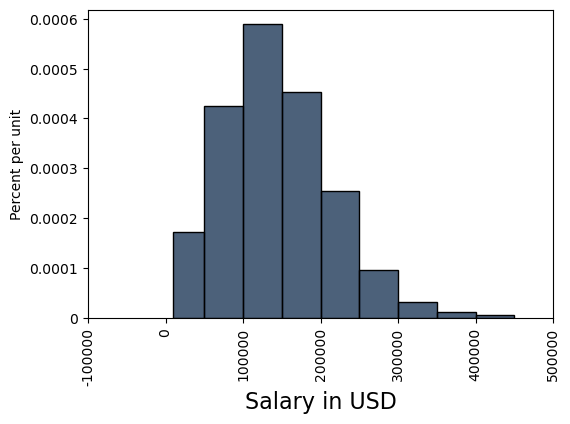

In [18]:
salaries.hist("Salary in USD", bins=[10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])

In [16]:
%%ai openai-chat:gpt-3.5-turbo --format code
My salaries table has Job Title, Employment Type, Experience Level, Expertise Level, Salary, Salary Currency, Company Location, Salary in USD, Employee Residence, Company Size and Year. I want to understand how salaries (in USD) are changing with experience levels. Use very simple methods using datascience module in Python correctly.

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


In [18]:
from datascience import *

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by experience level and calculate the average salary
avg_salary_by_experience = salaries_table.group('Experience Level', np.mean)

# Display the average salary by experience level
avg_salary_by_experience

Experience Level,Job Title mean,Employment Type mean,Expertise Level mean,Salary mean,Salary Currency mean,Company Location mean,Salary in USD mean,Employee Residence mean,Company Size mean,Year mean
Entry,,,,202933,,,79921.5,,,2022.15
Executive,,,,237493,,,191512,,,2022.52
Mid,,,,259106,,,108715,,,2022.34
Senior,,,,181573,,,160278,,,2022.6


In [19]:
%%ai openai-chat:gpt-3.5-turbo --format code
Now that we have avg_salary_by_experience, can we plot the Salary in USD mean by Experience Level?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


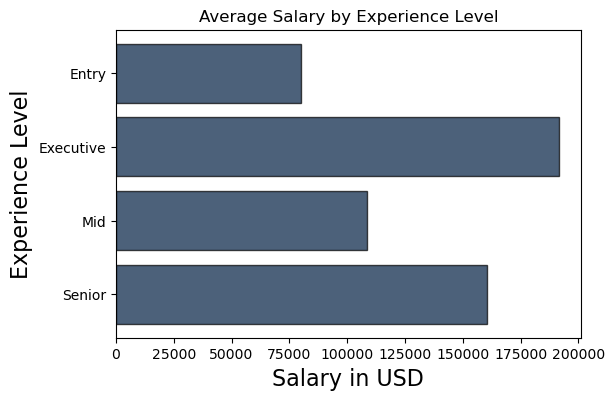

In [20]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by experience level and calculate the average salary
avg_salary_by_experience = salaries_table.group('Experience Level', np.mean)

# Plot the average salary by experience level
avg_salary_by_experience.barh('Experience Level', 'Salary in USD mean')

plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.title('Average Salary by Experience Level')
plt.show()

In [23]:
%%ai openai-chat:gpt-3.5-turbo --format code
I am also interested in understanding how the average Salary in USD changes over the years. Can you plot that?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


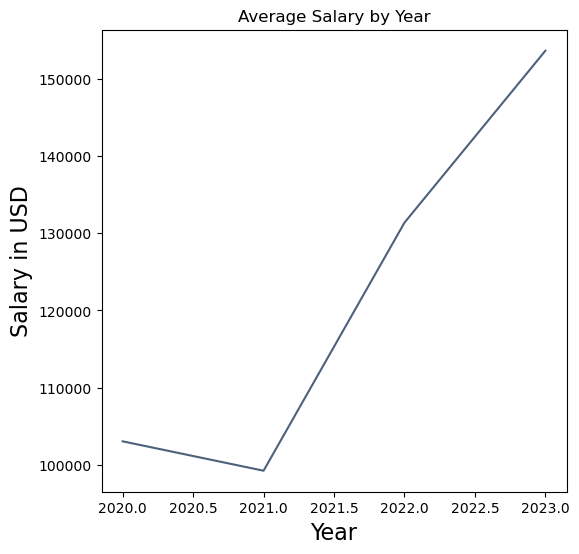

In [22]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Group the data by year and calculate the average salary
avg_salary_by_year = salaries_table.group('Year', np.mean)

# Plot the average salary by year
avg_salary_by_year.plot('Year', 'Salary in USD mean')

plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Average Salary by Year')
plt.show()

In [31]:
%%ai openai-chat:gpt-3.5-turbo --format code
It is a bit weird to see decimal values for Year. Can we change the x axis to reflect whole numbers and mark each year in the data with a dot on the plot?

/opt/conda/lib/python3.11/site-packages/langchain_community/llms/openai.py:1057: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


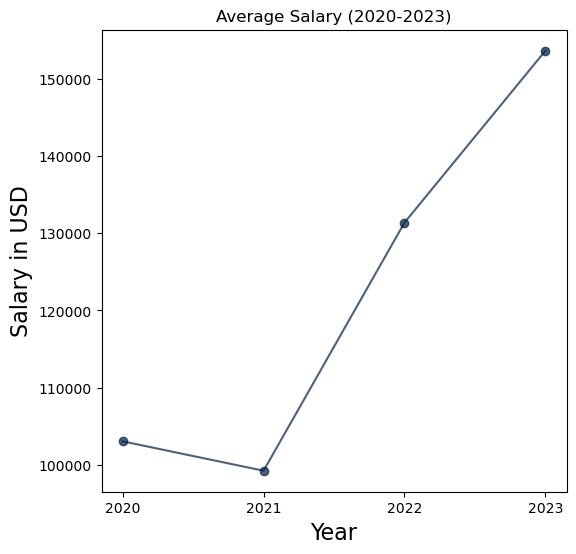

In [33]:
import matplotlib.pyplot as plt

# Read the salaries data into a datascience Table
salaries_table = Table.read_table('data/Latest_Data_Science_Salaries.csv')

# Filter the data for years 2020 to 2023
filtered_table = salaries_table.where('Year', are.between_or_equal_to(2020, 2023))

# Group the filtered data by year and calculate the average salary
avg_salary_by_year = filtered_table.group('Year', np.mean)

# Convert the 'Year' column to integer data type
avg_salary_by_year = avg_salary_by_year.with_column('Year', avg_salary_by_year.column('Year').astype(int))

# Plot the average salary by year
avg_salary_by_year.plot('Year', 'Salary in USD mean', marker='o')

plt.xticks(range(2020, 2024))
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Average Salary (2020-2023)')
plt.show()

#### What other interesting questions come to mind? Can you look at the data and think of questions you may want to explore about data science jobs? 